

# Getting Insights from vehicle market dataset

Importing necessary libraries

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Reading the Dataset and Performing elementry data refining

In [9]:
df = pd.read_csv('car details v4.csv')
df

Droping irrelevant columns like 'Kilometers','Fuel Type','Seller Type','Owner'
Dropping rows with blank values in them. (Rows with either of Drivetrain, Engine, Fuel Tank Capacity as NaN)

In [10]:
df.drop(['Kilometer','Fuel Type','Owner','Seller Type'],axis=1,inplace=True)
df.set_index(df.Model, inplace=True)
df.drop(df.loc[df.Drivetrain.isnull(),:].index,axis=0,inplace=True)
df.drop(df.loc[df.Engine.isnull(),:].index,axis=0,inplace=True)
df.drop(df.loc[df['Fuel Tank Capacity'].isnull(),:].index,axis=0,inplace=True)

In [11]:
df

,Make,Model,Price,Year,Transmission,Location,Color,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
Model,,,,,,,,,,,,,,,,
Amaze 1.2 VX i-VTEC,Honda,Amaze 1.2 VX i-VTEC,505000,2017,Manual,Pune,Grey,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
Swift DZire VDI,Maruti Suzuki,Swift DZire VDI,450000,2014,Manual,Ludhiana,White,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
i10 Magna 1.2 Kappa2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,Manual,Lucknow,Maroon,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
Glanza G,Toyota,Glanza G,799000,2019,Manual,Mangalore,Red,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
Innova 2.4 VX 7 STR [2016-2020],Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,Manual,Mumbai,Grey,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ritz Vxi (ABS) BS-IV,Maruti Suzuki,Ritz Vxi (ABS) BS-IV,245000,2014,Manual,Faridabad,White,1197 cc,85 bhp @ 6000 rpm,113 Nm @ 4500 rpm,FWD,3775.0,1680.0,1620.0,5.0,43.0
XUV500 W8 [2015-2017],Mahindra,XUV500 W8 [2015-2017],850000,2016,Manual,Surat,White,2179 cc,138 bhp @ 3750 rpm,330 Nm @ 1600 rpm,FWD,4585.0,1890.0,1785.0,7.0,70.0
Eon D-Lite +,Hyundai,Eon D-Lite +,275000,2014,Manual,Ahmedabad,White,814 cc,55 bhp @ 5500 rpm,75 Nm @ 4000 rpm,FWD,3495.0,1550.0,1500.0,5.0,32.0


In [12]:
df.columns

Index(['Make', 'Model', 'Price', 'Year', 'Transmission', 'Location', 'Color',
       'Engine', 'Max Power', 'Max Torque', 'Drivetrain', 'Length', 'Width',
       'Height', 'Seating Capacity', 'Fuel Tank Capacity'],
      dtype='object')

Plot showing count of the customers prefering given no. of seats in car.
We can conclude that majority of customers prefer 5 seater car.

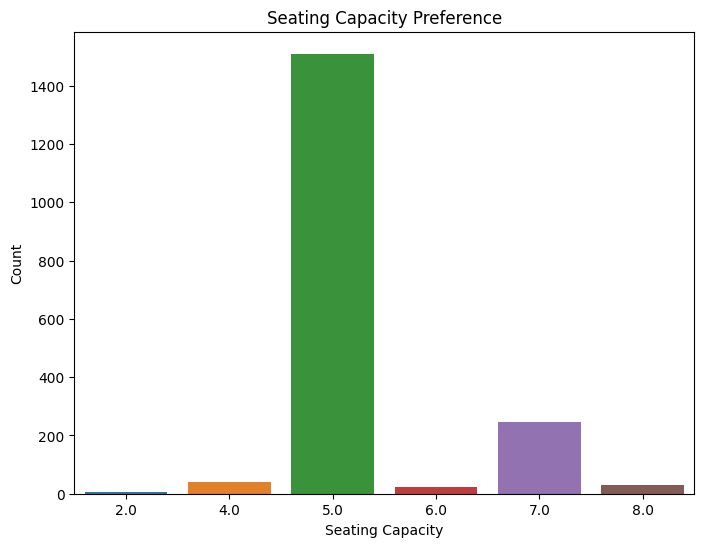

In [13]:
seating_counts = df['Seating Capacity'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=seating_counts.index, y=seating_counts.values)
plt.title('Seating Capacity Preference')
plt.xlabel('Seating Capacity')
plt.ylabel('Count')
plt.show()

Plot showing Price Range vs Count, 
Not useful yet.

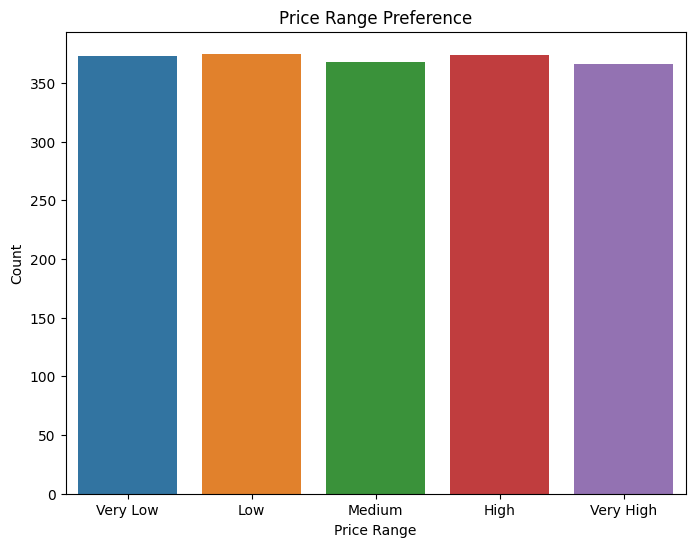

In [14]:
df['Price Range'] = pd.qcut(df['Price'], q=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
price_counts = df['Price Range'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=price_counts.index, y=price_counts.values)
plt.title('Price Range Preference')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.show()

Conveting the Max Torque Column from the form 'Nm @ rpm' to two seprate columns containing Torque, Rpm and Calculation Horsepower using the formula HP = Torque * rpm / 5252.
Removing cc unit from Engine column.

Convertin the Max Power column from the form ' bhp @ rpm' to one column containg power as 'bhp'

In [15]:
df['Max Torque'] = df['Max Torque'].str.replace(' Nm', '')  # Remove 'Nm' from torque values
df['Max Torque'] = df['Max Torque'].str.replace(' rpm', '')  # Remove 'rpm' from torque values
df['Torque'] = df['Max Torque'].str.split('@').str[0].str.strip()  # Extract the value before '@'
df['rpm'] = df['Max Torque'].str.split('@').str[1].str.strip()  # Extract the value before '@'
df['Horsepower'] = (df['Torque'].astype(float) * df['rpm'].astype(float)) / 5252
df.drop('Max Torque', axis =1 , inplace =True)

df['Engine'] = df['Engine'].str.replace(' cc', '')  # Remove 'cc' from torque values

df['Max Power'] = df['Max Power'].str.replace(' bhp', '')  # Remove 'bhp' 
df['Max Power'] = df['Max Power'].str.replace(' rpm', '')  # Remove 'rpm' from torque values
df['Power'] = df['Max Power'].str.split('@').str[0].str.strip()  # Extract the value before '@'
df.drop('Max Power', axis =1 , inplace =True)

In [16]:
df

,Make,Model,Price,Year,Transmission,Location,Color,Engine,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Price Range,Torque,rpm,Horsepower,Power
Model,,,,,,,,,,,,,,,,,,,
Amaze 1.2 VX i-VTEC,Honda,Amaze 1.2 VX i-VTEC,505000,2017,Manual,Pune,Grey,1198,FWD,3990.0,1680.0,1505.0,5.0,35.0,Low,109,4500,93.392993,87
Swift DZire VDI,Maruti Suzuki,Swift DZire VDI,450000,2014,Manual,Ludhiana,White,1248,FWD,3995.0,1695.0,1555.0,5.0,42.0,Very Low,190,2000,72.353389,74
i10 Magna 1.2 Kappa2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,Manual,Lucknow,Maroon,1197,FWD,3585.0,1595.0,1550.0,5.0,35.0,Very Low,112.7619,4000,85.881112,79
Glanza G,Toyota,Glanza G,799000,2019,Manual,Mangalore,Red,1197,FWD,3995.0,1745.0,1510.0,5.0,37.0,Medium,113,4200,90.365575,82
Innova 2.4 VX 7 STR [2016-2020],Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,Manual,Mumbai,Grey,2393,RWD,4735.0,1830.0,1795.0,7.0,55.0,High,343,1400,91.431835,148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ritz Vxi (ABS) BS-IV,Maruti Suzuki,Ritz Vxi (ABS) BS-IV,245000,2014,Manual,Faridabad,White,1197,FWD,3775.0,1680.0,1620.0,5.0,43.0,Very Low,113,4500,96.820259,85
XUV500 W8 [2015-2017],Mahindra,XUV500 W8 [2015-2017],850000,2016,Manual,Surat,White,2179,FWD,4585.0,1890.0,1785.0,7.0,70.0,Medium,330,1600,100.533130,138
Eon D-Lite +,Hyundai,Eon D-Lite +,275000,2014,Manual,Ahmedabad,White,814,FWD,3495.0,1550.0,1500.0,5.0,32.0,Very Low,75,4000,57.121097,55


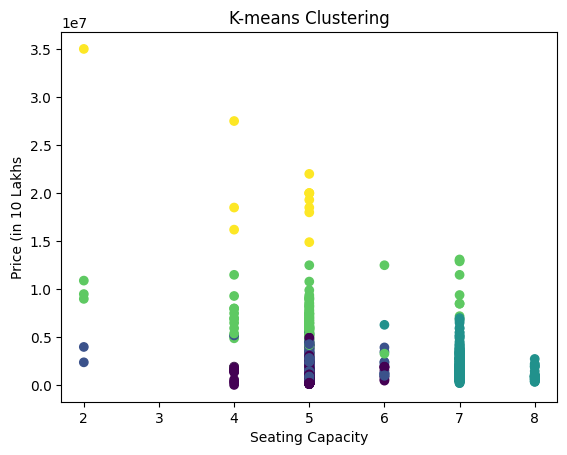

In [17]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


# Select the columns to use for clustering
selected_columns = ['Price', 'Seating Capacity', 'Horsepower']

# Preprocess the data by scaling the selected columns
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[selected_columns])

# Apply K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
kmeans.fit(df_scaled)
labels = kmeans.labels_

# Add the cluster labels to the dataframe
df['Cluster'] = labels

# Plot the clusters
# y=df['Price']
# y_array = np.array(y).reshape(-1, 1)
# scaler.fit(y_array)
# df['Price'] = scaler.inverse_transform(y_array)
plt.scatter(df['Seating Capacity'], df['Price'], c=labels, cmap='viridis')
plt.xlabel('Seating Capacity')
plt.ylabel('Price (in 10 Lakhs')
plt.title('K-means Clustering')
plt.show()

From the plot above, we can infer that in the range of 5 Lakh rupees there customers are mainly clustered in two groups with preference for 5 seats and 7 seats respectively.
For Price close to 10 Lakhs and above, majority of people prefere 5 seater cars followed by 4 seaters.

From the scatter plot below we can get the idea of horsepower for corrosponding price range. 
Below the budget of 5 laks horsepower is less that 200. Further we can see two clustoers, one preferring features with horsepower compromised and other cluster with preferring powerfull engines.

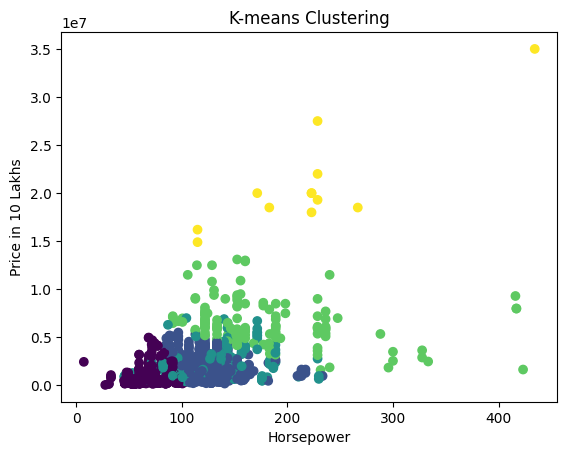

In [18]:
plt.scatter(df['Horsepower'], df['Price'], c=labels, cmap='viridis')
plt.xlabel('Horsepower')
plt.ylabel('Price in 10 Lakhs')
plt.title('K-means Clustering')
plt.show()

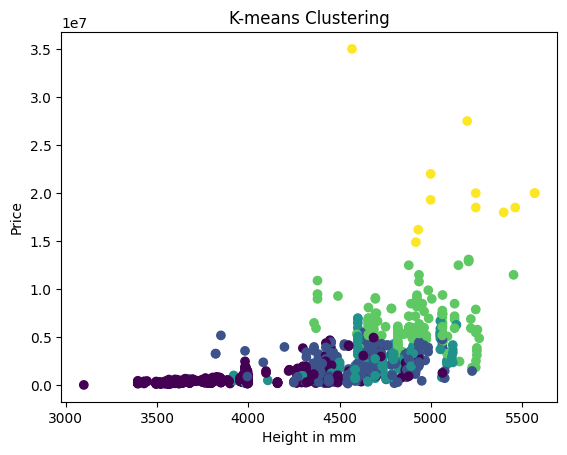

In [19]:
plt.scatter(df.Length , df['Price'], c=labels, cmap='viridis')
plt.xlabel('Height in mm')
plt.ylabel('Price')
plt.title('K-means Clustering')
plt.show()

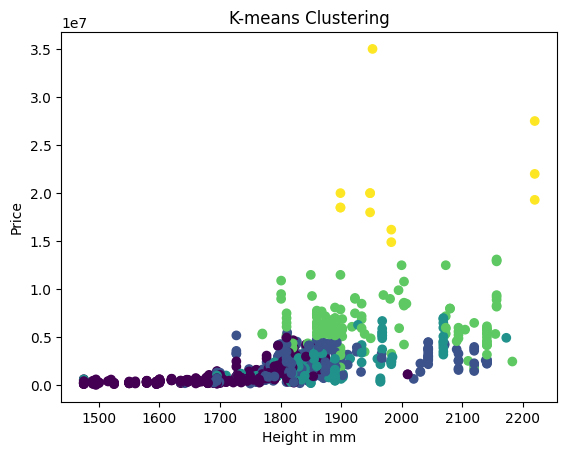

In [20]:
plt.scatter(df.Width , df['Price'], c=labels, cmap='viridis')
plt.xlabel('Height in mm')
plt.ylabel('Price')
plt.title('K-means Clustering')
plt.show()

Below this are the attempts to segment the given dataset more accurately and gaining more insights.

In [21]:
X = df.loc[:,['Price','Engine','Length','Width','Height','Seating Capacity','Fuel Tank Capacity','Torque','Horsepower','Power']]

In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca.fit(X)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[9.99999928e-01 5.84305913e-08 8.95443114e-09 2.66911615e-09
 9.96781242e-10 4.26641284e-10 1.32100541e-10 5.44552424e-11
 7.60439018e-12 4.16118335e-14]
[1.04850720e+08 2.53449579e+04 9.92179920e+03 5.41695428e+03
 3.31033055e+03 2.16572282e+03 1.20510179e+03 7.73733286e+02
 2.89136972e+02 2.13884769e+01]


In [23]:
pca_components = pd.DataFrame(pca.components_, columns = X.columns)

In [24]:
pca_components

,Price,Engine,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Torque,Horsepower,Power
0,1.000000e+00,0.000159,0.000102,0.000031,0.000005,-8.904080e-09,0.000004,0.000039,0.000010,0.000020
1,1.955422e-04,-0.829179,-0.515930,-0.121858,-0.080662,-6.452169e-04,-0.015851,-0.141903,-0.037454,-0.055961
2,5.855919e-06,0.525020,-0.823141,-0.141348,0.158227,2.363424e-04,-0.007777,-0.041281,-0.000354,-0.003515
3,-7.437209e-06,0.158169,-0.031266,-0.260126,-0.943084,-3.496474e-03,-0.025668,-0.090300,0.062148,0.065142
4,1.496395e-05,0.041286,0.234753,-0.782850,0.250912,2.956151e-03,-0.024816,-0.498812,-0.073854,-0.111730
5,5.561807e-06,0.078938,-0.007293,0.525541,-0.051988,-2.734548e-04,-0.028055,-0.837069,0.072582,-0.089883
6,-3.353654e-06,-0.056297,-0.001518,-0.091160,0.101742,-2.632439e-03,0.025371,-0.024696,0.930772,0.332521
7,6.056050e-06,0.026326,0.004041,0.000461,-0.050417,5.341353e-03,0.002271,0.135122,0.342251,-0.928074
8,-1.062354e-07,-0.000389,-0.009738,-0.012106,-0.021958,-7.763169e-03,0.998457,-0.040491,-0.023232,-0.010931
9,-2.296924e-08,0.000498,0.001045,-0.001167,0.003776,-9.999414e-01,-0.007774,0.000253,-0.000873,-0.006246


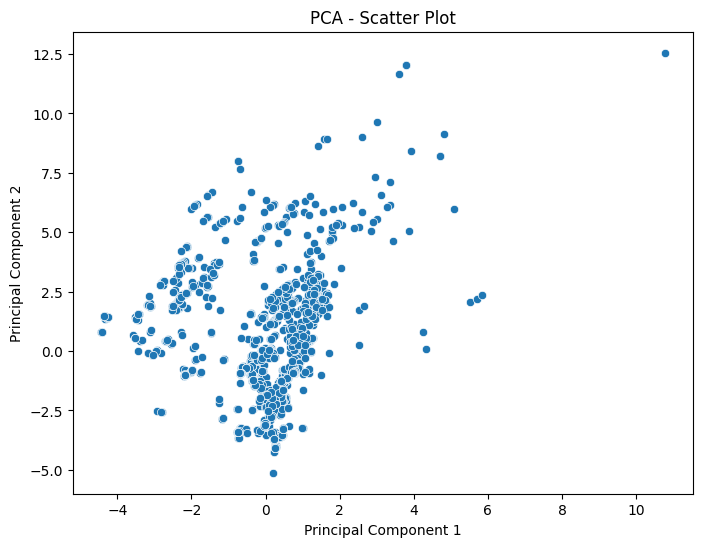

In [27]:

selected_columns = ['Price', 'Engine', 'Length', 'Width', 'Height', 'Seating Capacity','Fuel Tank Capacity', 'Torque', 'Horsepower', 'Power']

# Preprocess the data by scaling the selected columns
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[selected_columns])

# Apply PCA with 2 components
pca = PCA(n_components=10)
components = pca.fit_transform(df_scaled)

# Create a scatter plot of the components
plt.figure(figsize=(8, 6))
sns.scatterplot(x=components[:, 1], y=components[:, 0])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - Scatter Plot')
plt.show()


[[0 1]
 [0 1]
 [0 1]
 ...
 [0 1]
 [0 1]
 [1 0]]
[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [1 2]]
-53.997351157739416
-53.99735115773943


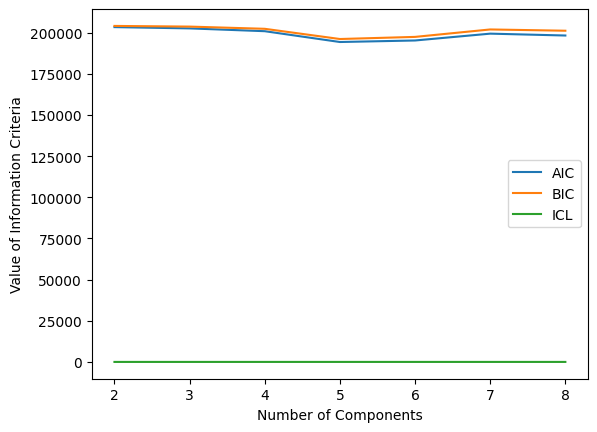

In [20]:
from sklearn.mixture import GaussianMixture

n_components = range(2, 9)
models = []
for n in n_components:
    model = GaussianMixture(n_components=n)
    model.fit(X)
    models.append(model)

import matplotlib.pyplot as plt
aic = [model.aic(X) for model in models]
bic = [model.bic(X) for model in models]
icl = [model.lower_bound_ for model in models]

plt.plot(n_components, aic, label='AIC')
plt.plot(n_components, bic, label='BIC')
plt.plot(n_components, icl, label='ICL')
plt.xlabel('Number of Components')
plt.ylabel('Value of Information Criteria')
plt.legend()
plt.show()

best_model = models[2]

kmeans = KMeans(n_clusters=4,  n_init=10)
kmeans.fit(X)
kmeans_clusters = kmeans.predict(X)
mixture_clusters = best_model.predict(X)

table = np.column_stack((kmeans_clusters, mixture_clusters))
print(table)

mixture_model = GaussianMixture(n_components=4)
mixture_model.fit(X, kmeans_clusters)

new_mixture_clusters = mixture_model.predict(X)
table = np.column_stack((kmeans_clusters, new_mixture_clusters))
print(table)

log_likelihood = mixture_model.score(X)
print(log_likelihood)

log_likelihood_best = best_model.score(X)
print(log_likelihood_best)

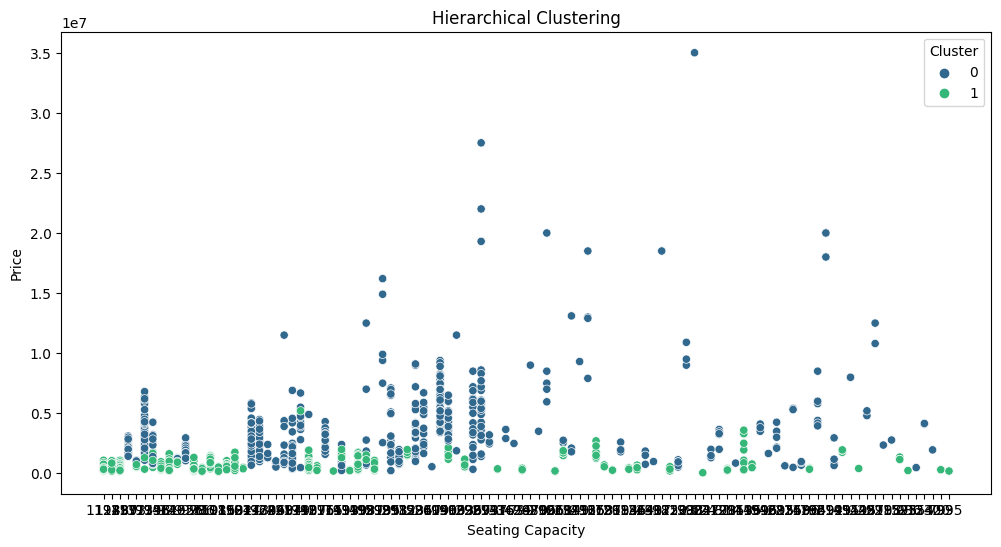

In [21]:
from sklearn.cluster import AgglomerativeClustering


# Preprocess the data by scaling the selected columns
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[selected_columns])

# Apply hierarchical clustering
cluster = AgglomerativeClustering(n_clusters=2)
cluster_labels = cluster.fit_predict(df_scaled)

# Add cluster labels to the dataframe
df['Cluster'] = cluster_labels

# Visualize the clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Engine', y='Price', hue='Cluster', palette='viridis')
plt.xlabel('Seating Capacity')
plt.ylabel('Price')
plt.title('Hierarchical Clustering')
plt.show()

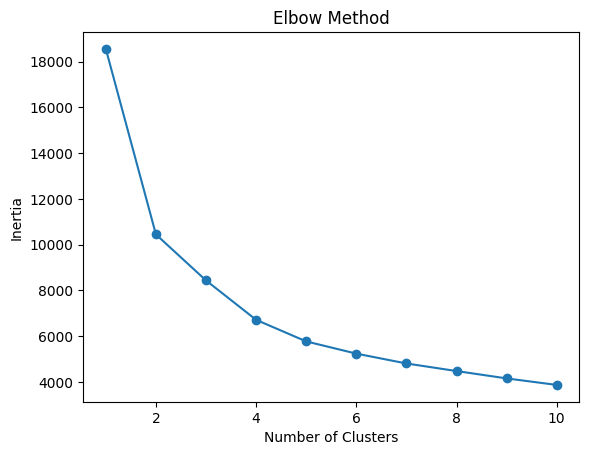

In [22]:

selected_columns = ['Price', 'Engine', 'Length', 'Width', 'Height', 'Seating Capacity','Fuel Tank Capacity', 'Torque', 'Horsepower', 'Power']

# Preprocess the data by scaling the selected columns
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[selected_columns])

# Perform K-means clustering for different numbers of clusters
clusters = range(1, 11)
inertias = []
for n_clusters in clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertias.append(kmeans.inertia_)

# Plot the inertia values
plt.plot(clusters, inertias, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method') 
plt.show()

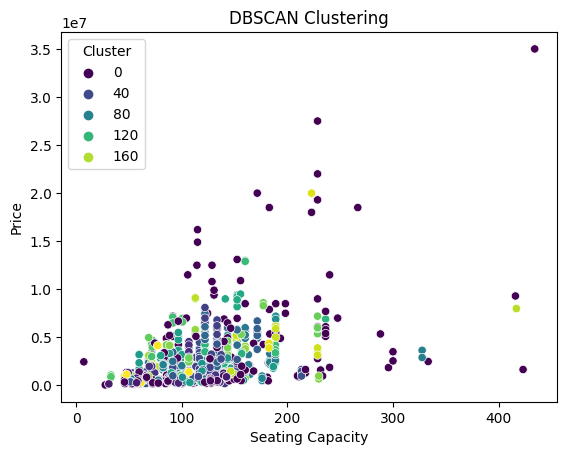

In [42]:
from sklearn.cluster import DBSCAN


# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=2)
cluster_labels = dbscan.fit_predict(df_scaled)

# Add cluster labels to the dataframe
df['Cluster'] = cluster_labels

# Visualize the clusters
sns.scatterplot(data=df, x='Horsepower', y='Price', hue='Cluster', palette='viridis')
plt.xlabel('Seating Capacity')
plt.ylabel('Price')
plt.title('DBSCAN Clustering')
plt.show()

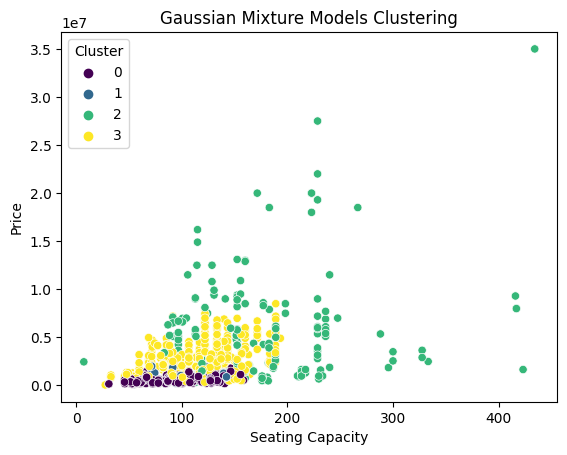

In [24]:
from sklearn.mixture import GaussianMixture

# Perform Gaussian Mixture Models clustering
gmm = GaussianMixture(n_components=4, random_state=42)
cluster_labels = gmm.fit_predict(df_scaled)

# Add cluster labels to the dataframe
df['Cluster'] = cluster_labels

# Visualize the clusters
sns.scatterplot(data=df, x='Horsepower', y='Price', hue='Cluster', palette='viridis')
plt.xlabel('Seating Capacity')
plt.ylabel('Price')
plt.title('Gaussian Mixture Models Clustering')
plt.show()